### IMPORT MODULES

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import pickle
import gradio as gr
from sklearn.preprocessing import LabelEncoder
import os
import warnings
warnings.filterwarnings("ignore")

### LOAD DATASET

In [9]:
df=pd.read_csv(r"C:\Users\MERIN BABU\Downloads\state_weather_aqi_data_mf2.csv")
df

,state,city,station,date,time,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE,AQI,Predominant_Parameter
0,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",03-01-2020,10:00:00,68,64,17,4,28,31,40,68,PM2.5
1,Andhra_Pradesh,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",03-01-2020,10:00:00,67,70,23,2,13,49,77,77,OZONE
2,Andhra_Pradesh,Tirupati,"Tirumala, Tirupati - APPCB",03-01-2020,10:00:00,32,64,26,5,6,19,16,32,PM2.5
3,Andhra_Pradesh,Visakhapatnam,"GVM Corporation, Visakhapatnam - APPCB",03-01-2020,10:00:00,93,93,31,3,9,57,61,93,PM10
4,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",05-01-2020,06:00:00,60,55,20,5,18,29,53,60,PM2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1560,West_Bengal,Kolkata,"Jadavpur, Kolkata - WBPCB",07-01-2020,03:00:00,163,142,57,7,10,39,8,163,PM2.5
1561,West_Bengal,Kolkata,"Rabindra Bharati University, Kolkata - WBPCB",07-01-2020,03:00:00,279,215,78,11,23,31,53,279,PM2.5
1562,West_Bengal,Kolkata,"Rabindra Sarobar, Kolkata - WBPCB",07-01-2020,03:00:00,162,136,43,4,16,34,44,162,PM2.5
1563,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",07-01-2020,03:00:00,213,152,55,5,11,95,64,213,PM2.5


### EXPLORATORY DATA ANALYSIS

In [10]:
df.head()

,state,city,station,date,time,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE,AQI,Predominant_Parameter
0,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",03-01-2020,10:00:00,68,64,17,4,28,31,40,68,PM2.5
1,Andhra_Pradesh,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",03-01-2020,10:00:00,67,70,23,2,13,49,77,77,OZONE
2,Andhra_Pradesh,Tirupati,"Tirumala, Tirupati - APPCB",03-01-2020,10:00:00,32,64,26,5,6,19,16,32,PM2.5
3,Andhra_Pradesh,Visakhapatnam,"GVM Corporation, Visakhapatnam - APPCB",03-01-2020,10:00:00,93,93,31,3,9,57,61,93,PM10
4,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",05-01-2020,06:00:00,60,55,20,5,18,29,53,60,PM2.5


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   state                  1565 non-null   object
 1   city                   1565 non-null   object
 2   station                1565 non-null   object
 3   date                   1565 non-null   object
 4   time                   1565 non-null   object
 5   PM2.5                  1565 non-null   int64 
 6   PM10                   1565 non-null   int64 
 7   NO2                    1565 non-null   int64 
 8   NH3                    1565 non-null   int64 
 9   SO2                    1565 non-null   int64 
 10  CO                     1565 non-null   int64 
 11  OZONE                  1565 non-null   int64 
 12  AQI                    1565 non-null   int64 
 13  Predominant_Parameter  1565 non-null   object
dtypes: int64(8), object(6)
memory usage: 171.3+ KB


In [12]:
df.isnull().sum()

state                    0
city                     0
station                  0
date                     0
time                     0
PM2.5                    0
PM10                     0
NO2                      0
NH3                      0
SO2                      0
CO                       0
OZONE                    0
AQI                      0
Predominant_Parameter    0
dtype: int64

In [13]:
df.describe()

,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE,AQI
count,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000
mean,182.016613,146.513099,46.641534,8.566134,16.426198,51.463898,30.003195,188.400639
std,104.352717,71.436006,30.414232,5.119818,11.949508,27.553078,21.881496,98.924827
min,9.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000
25%,92.000000,94.000000,25.000000,4.000000,9.000000,31.000000,14.000000,101.000000
50%,167.000000,135.000000,43.000000,8.000000,14.000000,47.000000,26.000000,175.000000
75%,277.000000,197.000000,62.000000,12.000000,20.000000,66.000000,41.000000,278.000000
max,441.000000,394.000000,247.000000,34.000000,92.000000,200.000000,206.000000,441.000000


In [14]:
df.shape

(1565, 14)

In [15]:
df['AQI'].max()

441

In [16]:
df['AQI'].min()

25

In [17]:
df['AQI'].value_counts()

AQI
306    35
189    24
69     20
123    18
203    15
       ..
140     1
400     1
398     1
73      1
279     1
Name: count, Length: 346, dtype: int64

In [18]:
df=df.drop(['time','date'],axis=True)
df

,state,city,station,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE,AQI,Predominant_Parameter
0,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",68,64,17,4,28,31,40,68,PM2.5
1,Andhra_Pradesh,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",67,70,23,2,13,49,77,77,OZONE
2,Andhra_Pradesh,Tirupati,"Tirumala, Tirupati - APPCB",32,64,26,5,6,19,16,32,PM2.5
3,Andhra_Pradesh,Visakhapatnam,"GVM Corporation, Visakhapatnam - APPCB",93,93,31,3,9,57,61,93,PM10
4,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",60,55,20,5,18,29,53,60,PM2.5
...,...,...,...,...,...,...,...,...,...,...,...,...
1560,West_Bengal,Kolkata,"Jadavpur, Kolkata - WBPCB",163,142,57,7,10,39,8,163,PM2.5
1561,West_Bengal,Kolkata,"Rabindra Bharati University, Kolkata - WBPCB",279,215,78,11,23,31,53,279,PM2.5
1562,West_Bengal,Kolkata,"Rabindra Sarobar, Kolkata - WBPCB",162,136,43,4,16,34,44,162,PM2.5
1563,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",213,152,55,5,11,95,64,213,PM2.5


### VISUALIZATION

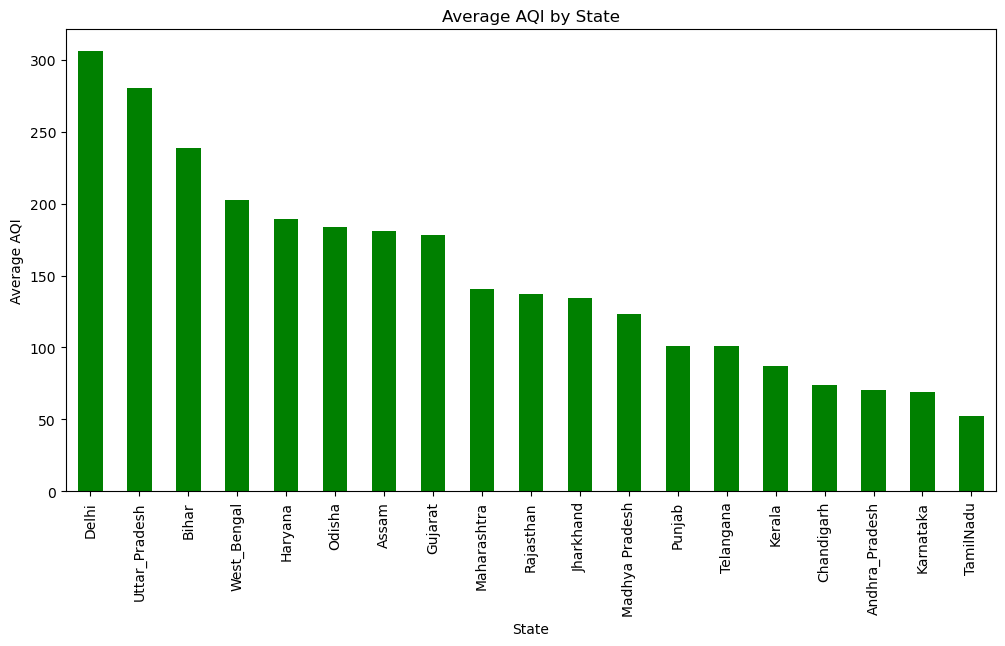

In [19]:
aqi_by_state = df.groupby("state")["AQI"].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
aqi_by_state.plot(kind='bar', color='green')
plt.title("Average AQI by State")
plt.xlabel("State")
plt.ylabel("Average AQI")
plt.xticks(rotation=90)
plt.show()

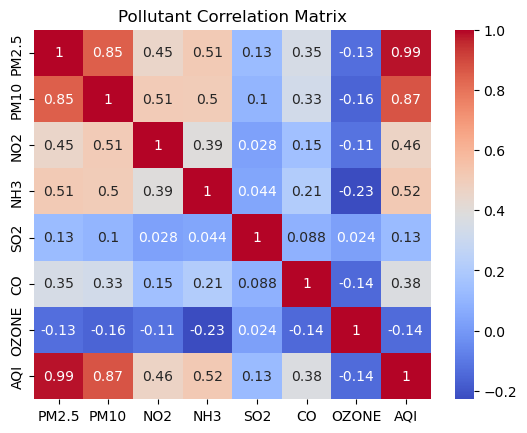

In [20]:
import seaborn as sns
corr = df[['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'OZONE', 'AQI']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Pollutant Correlation Matrix")
plt.show()         

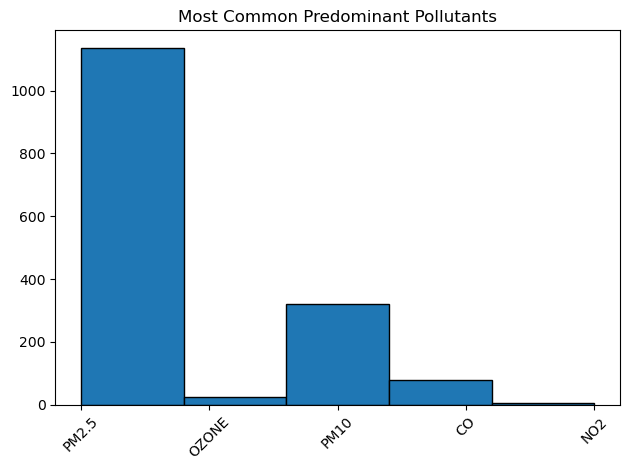

In [21]:
plt.hist(df['Predominant_Parameter'], bins=len(df['Predominant_Parameter'].unique()), edgecolor='black')
plt.xticks(rotation=45,label='Predominant_Parameter')
plt.title("Most Common Predominant Pollutants")
plt.tight_layout()
plt.show()

In [22]:
label1=LabelEncoder()
label2=LabelEncoder()
label3=LabelEncoder()
label4=LabelEncoder()

In [23]:
df['state']=label1.fit_transform(df['state'])
df['city']=label2.fit_transform(df['city'])
df['station']=label3.fit_transform(df['station'])
df['Predominant_Parameter']=label4.fit_transform(df['Predominant_Parameter'])

### Seperate Feature and Target

In [24]:
x=df.drop('AQI',axis=1)
y=df.AQI

In [25]:
x.head()

,state,city,station,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE,Predominant_Parameter
0,0,4,150,68,64,17,4,28,31,40,4
1,0,86,4,67,70,23,2,13,49,77,2
2,0,100,182,32,64,26,5,6,19,16,4
3,0,106,47,93,93,31,3,9,57,61,3
4,0,4,150,60,55,20,5,18,29,53,4


In [26]:
y.head()

0    68
1    77
2    32
3    93
4    60
Name: AQI, dtype: int64

### Train-Test-Split

In [27]:

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=43)

In [28]:
xtrain.head()

,state,city,station,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE,Predominant_Parameter
835,10,44,30,90,107,80,5,13,28,42,3
57,2,83,145,238,150,36,9,14,48,50,4
1559,18,58,44,247,167,67,5,12,43,55,4
447,6,11,8,167,106,69,7,13,65,27,4
268,4,26,133,256,205,86,6,18,37,17,4


In [29]:
ytrain.head()

835     107
57      239
1559    247
447     167
268     256
Name: AQI, dtype: int64

In [30]:
print(xtrain.shape,ytrain.shape,xtest.shape)

(1173, 11) (1173,) (392, 11)


### RANDOM FOREST REGRESSOR

In [31]:
rf= RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(xtrain, ytrain)

RandomForestRegressor(n_estimators=200, random_state=42)

In [32]:
rf_ypred =rf.predict(xtest)

In [33]:
rf_mae=mean_absolute_error(ytest,rf_ypred)
rf_mse=mean_squared_error(ytest,rf_ypred)
rf_r2=r2_score(ytest,rf_ypred)
print("mean absolute error:",rf_mae)
print("mean squared error:",rf_mse)
print("R2 score:",rf_r2)

mean absolute error: 1.811211734693877
mean squared error: 23.87137608418367
R2 score: 0.9976878270620816


### DECISION TREE REGRESSOR

In [34]:
dt= DecisionTreeRegressor(random_state=42)
dt.fit(xtrain,ytrain)

DecisionTreeRegressor(random_state=42)

In [35]:
dt_ypred =dt.predict(xtest)

In [36]:
dt_mae=mean_absolute_error(ytest,dt_ypred)
dt_mse=mean_squared_error(ytest,dt_ypred)
dt_r2=r2_score(ytest,dt_ypred)
print("mean absolute error:",dt_mae)
print("mean squared error:",dt_mse)
print("R2 score:",dt_r2)

mean absolute error: 1.8061224489795917
mean squared error: 26.142857142857142
R2 score: 0.9974678122202754


### LINEAR REGRESSION

In [37]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [38]:
lr_ypred =lr.predict(xtest)

In [39]:
lr_mae=mean_absolute_error(ytest,lr_ypred)
lr_mse=mean_squared_error(ytest,lr_ypred)
lr_r2=r2_score(ytest,lr_ypred)
print("mean absolute error:",lr_mae)
print("mean squared error:",lr_mse)
print("R2 score:",lr_r2)

mean absolute error: 9.00629240504305
mean squared error: 204.6583553071934
R2 score: 0.9801768650038688


### MAKING PREDICTION SYSTEM

In [40]:
input_data=(0,4,150,68,64,17,4,28,31,40,4)

input_data_as_numpy_array=np.asarray(input_data)

input_data_reshape=input_data_as_numpy_array.reshape(1,-1)

prediction=rf.predict(input_data_reshape)
print(prediction)



[67.86]


### save the model to pickle

In [41]:
loaded_model=pickle.load(open(r"C:\Users\MERIN BABU\ML sample project\model_trained.sav",'rb'))
loaded_model

RandomForestRegressor(n_estimators=200, random_state=42)

### USER INTERFACE

In [42]:
states = sorted(df['state'].dropna().unique())
cities = sorted(df['city'].dropna().unique())
stations = sorted(df['station'].dropna().unique())
Predominant_Parameter = sorted(df['Predominant_Parameter'].dropna().unique())

In [43]:
# Load the trained model
model = pickle.load(open("model_trained.sav", "rb"))

# Load encoders
state_encoder = pickle.load(open("state_encoder.pkl", "rb"))
city_encoder = pickle.load(open("city_encoder.pkl", "rb"))
station_encoder = pickle.load(open("station_encoder.pkl", "rb"))
predominant_parameter_encoder = pickle.load(open("predominant_parameter_encoded.pkl", "rb"))

# Dropdown options from encoders
state_options = state_encoder.classes_.tolist()
city_options = city_encoder.classes_.tolist()
station_options = station_encoder.classes_.tolist()
predominant_parameter_options = predominant_parameter_encoder.classes_.tolist()

# ✅ Prediction function
def predict_aqi(state, city, station, pm25, pm10, no2, nh3, so2, co, ozone, predominant_parameter):
    state_encoded = state_encoder.transform([state])[0]
    city_encoded = city_encoder.transform([city])[0]
    station_encoded = station_encoder.transform([station])[0]
    predominant_parameter_encoded = predominant_parameter_encoder.transform([predominant_parameter])[0]
    
    # Combine all features into a single array
    features = np.array([[state_encoded, city_encoded, station_encoded, pm25, pm10, no2, nh3, so2, co, ozone, predominant_parameter_encoded]])
    prediction = model.predict(features)[0]
    return round(prediction, 2)

# ✅ Create the Gradio interface
interface = gr.Interface(
    fn=predict_aqi,
    inputs=[
        gr.Dropdown(state_options, label="State"),
        gr.Dropdown(city_options, label="City"),
        gr.Dropdown(station_options, label="Station"),
        gr.Number(label="PM2.5"),
        gr.Number(label="PM10"),
        gr.Number(label="NO2"),
        gr.Number(label="NH3"),
        gr.Number(label="SO2"),
        gr.Number(label="CO"),
        gr.Number(label="OZONE"),
        gr.Dropdown(predominant_parameter_options, label="Predominant Parameter"),
    ],
    outputs=gr.Number(label="Predicted AQI"),
    title="Air Quality Index Predictor",
    description="Enter the inputs to predict AQI using the trained ML model"
)

interface.launch()

* Running on local URL:  http://127.0.0.1:7877

To create a public link, set `share=True` in `launch()`.
